# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw
import numpy as np

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can neither become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as neither type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$ 

$$\frac{dR}{dt} = \gamma I$$  

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

Growth rate of infected in SIS model: 
$ \frac{dI}{dt} = \beta S I - \gamma I $

Growth rate of susceptible in SIS model: $ \frac{dS}{dt} = -\frac{dI}{dt} = -\beta S I + \gamma I$

I would say techinically 2, the first equation is the growth rate of infected and the second would be the growth rate of susceptibles, however the latter is simply the negative of the first one. The first equation is the number of people getting infected with some probability $\beta$ on the multiplied into the number of susceptible, $S$, and infected, $I$ and then subtracted by the number of infected people who become susceptible again, $\gamma I$. Where $\gamma$ is the recovery rate of infected, in this case people who recover does not become resistant but rather susceptible. A big beta would describe a high probability of spreading disease. A small gamma is a low recoery rate. With a big beta and small gamma you would see an increasing number of infected and small recovery, which would probably look like a potensfunction (a steepening then flattening curve) of infected people.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.


Growth rate of infected in SIRS model: 
$ \frac{dI}{dt} = \beta S I - \gamma I $

Growth rate of susceptible in SIRS model: $ \frac{dS}{dt} = -\frac{dI}{dt} + \eta R = -\beta S I + \gamma I + \eta R$

Growth rate of recovered in the SIRS model: $\frac{dR}{dt} = \gamma I$

Where $\eta$ describes the factor of how many recovered people, $R$, become susceptible to the disease again.


> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?

For each strategy I tried 5 times with the same percentage, given it is random I got slightly different results, however:
I tried setting it to 80 % and got around 10 or below after a few tries with strategy A (random).
For strategy B (strongly connected) this was achieved with around 22-25 %. For strategy C (random neighbours) around 60%.

> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?

The professor describes this scenario as the "friendship paradox".
In strategy A we pick random nodes with the same uniform distribution of $U \sim 1/N$. 
Picking random neighbours of the random node we must include the node degree, $q$, which means we are not picking from a uniform distribution and instead our picks are skewed towards nodes with a higher degree of neighbours. As the professor puts it "Your friends have more friends than you". Feelsbadman.

> 3. Why is this effect larger in the BA network than in the ER network?

The BA network has a higher degree in node variation than the original ER network. This means in the BA network when choosing strategy C we are even more inclined/likely to pick nodes with higher degrees, making the vacciation more effective than it would be deploying the same strategy in the ER network.

> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

I choose explorable 2, the dynamics of the SIRS epidemic model. This seems to be the strategy employed by most governments around the world in the pandemic that does not follow the "herd immunity" idea. I put the transmission rate to max and recovery and waning immunity rates stay at default. The simulation is continously ongoing, never ending (at least running for 5 minutes). Although not necessarily applicable to the real world it shows that hard lockdowns would prove ineffective if the transmission rate is too high (or increases when you inevitably have to open up again) and if the disease mutates (waning immunity). This could be an argument for herd immunity. 


> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

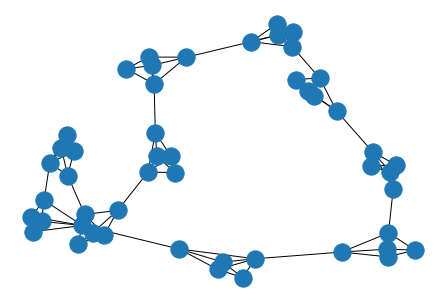

In [14]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network
nx.draw(G) # Visualization of network

In [51]:
p_I = 0.01 # Infection probability rate, must be between 0 and 1. NOTE I SET MINE TO 1 % instead of 10 %
n_iter = 200 # Number of iterations, time unit. 
T_I = 10 # Time units before infected nodes become susceptible again
T = [] # Empty list to hold infected for T_I time units
S_I = set()

I = set() # List/Set of infected nodes 
S = set(G.nodes()) #List/set of susceptible nodes

patient0 = np.random.choice(list(S)) # The patient 0 is a random node from the list of susceptible nodes

I.add(patient0) # The patient zero is by definition the first infected, thereby added to list of infected
S.remove(patient0) # Removes patient 0 from set of susceptible nodes

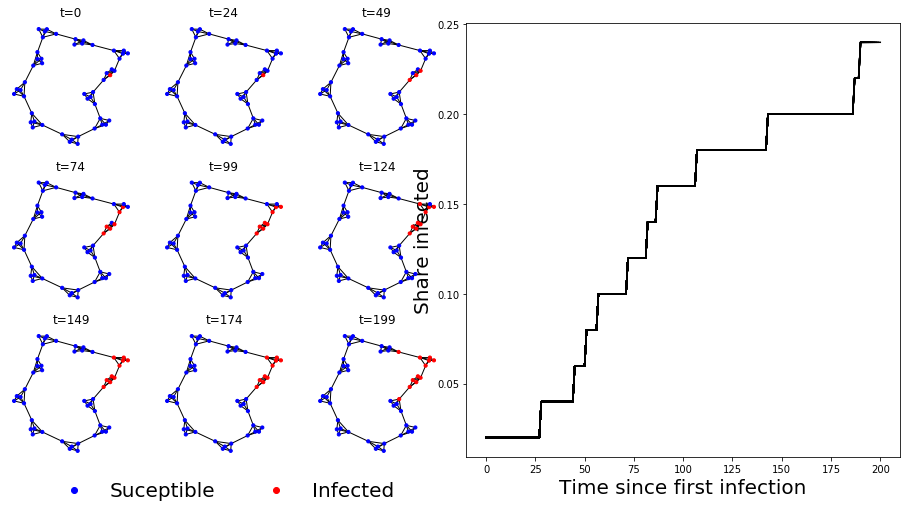

In [52]:
# MUCH INSPIRATION DRAWN FROM THE WRITE UP

from matplotlib import gridspec
from matplotlib.lines import Line2D
import warnings # gets rid of warnings (important)
warnings.filterwarnings("ignore")

# Defining graph function
def gdraw(G,S,ax):
    nx.draw(G, ax=ax, pos = nx.spring_layout(G,seed=10),
           node_color = ['blue' if n in S else 'red' for n in range(N)],
            node_size = 10) 
    
N = len(G.nodes()) # Number of nodes, population of network
frac_I = [len(I)/N]  # Number of infected people as a fraction of total population

# Defining figure size and dimensions, and misc
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(3,6)
x = 0
y = 0
ax = plt.subplot(gs[x,y])
gdraw(G,S,ax)
ax.set_title('t=0')

# Iterating over time period (200 steps)
for t in range(n_iter):
    # Iterating over infected list
    for infected_node in list(I):
        # Defining neighbours to the infected node
        neighbors = G.neighbors(infected_node) 
        # Picking at random the infected neighbours, infected if value is less than the infected probability
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])   
        I |= infected_neighbors # Update newly infected
        S -= infected_neighbors # Subtract newly infected from susceptible nodes
        
        # Newly susceptible
       # if infected_neighbors and I >= infected_neighbors:
       #     S_I |=infected_neighbors #Adding infected neighbours to new susceptibles 
            
    #if S_I:
    #    T.append(S_I) #
   # if len(I)>=T_I: # Every 10 time units more
     #   try:
      #      I -= T[0] # Removing infected from this compartment 
      #      S |= T[0] # Add them to susceptible again
      #      del T[0]
     #   except:
      #      pass
        ### Out commented code doesnt work as intended
        
    frac_I.append(len(I)/N) # Updating infected ratio
 
    # Splitting in 8 subperiods
    if ((t+1)/(n_iter/8)) % 1 == 0: 
        y +=1
        if y > 2:
            y = 0
            x += 1
        ax = plt.subplot(gs[x,y])
        gdraw(G,S,ax)
        ax.set_title(f't={t}')

    # Legend styles
    custom_entries = [Line2D([0],[0], marker = 'o', color = 'blue', label = 'Suceptible', lw=0),
                      Line2D([0], [0],marker = 'o', color = 'red', label = 'Infected', lw=0)]

    ax = plt.subplot(gs[:,3:])
    ax.plot(frac_I, color = 'black')
    ax.set_xlabel('Time since first infection', fontsize = 20)
    ax.set_ylabel('Share infected', fontsize = 20)

    # Legend style subplots
    ax = plt.subplot(gs[2,1])
    ax.legend(handles = custom_entries,
             fontsize = 20,
             frameon = False,
             loc = 'upper center',
             bbox_to_anchor = (0.5,-0.05),
             ncol = 2)

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [79]:
import pandas as pd
from datetime import datetime as dt
import networkx as nx

data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

t0 = data.timestamp.max() - 86400 * 2 # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice


# Pasting into a function
def func_DI(t0, t1, data):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe
    G = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G

In [80]:
G = func_DI(t0, t1, data)

In [81]:
p_I = 0.1 # Infection probability rate, must be between 0 and 1. NOTE I SET MINE TO 1 % instead of 10 %
n_iter = 10# Number of iterations, time unit. 
I = set() # List/Set of infected nodes 
S = set(G.nodes()) #List/set of susceptible nodes

patient0 = np.random.choice(list(S)) # The patient 0 is a random node from the list of susceptible nodes

I.add(patient0) # The patient zero is by definition the first infected, thereby added to list of infected
S.remove(patient0) # Removes patient 0 from set of susceptible nodes

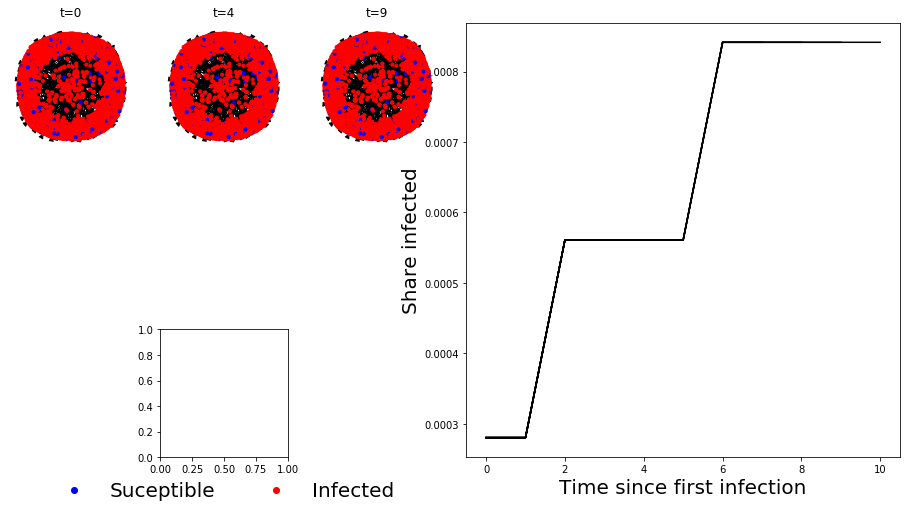

In [82]:
# Defining graph function
def gdraw(G,S,ax):
    nx.draw(G, ax=ax, pos = nx.spring_layout(G,seed=10),
           node_color = ['blue' if n in S else 'red' for n in range(N)],
            node_size = 10) 
    
N = len(G.nodes()) # Number of nodes, population of network
frac_I = [len(I)/N]  # Number of infected people as a fraction of total population

# Defining figure size and dimensions, and misc
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(3,6)
x = 0
y = 0
ax = plt.subplot(gs[x,y])
gdraw(G,S,ax)
ax.set_title('t=0')

# Iterating over time period (200 steps)
for t in range(n_iter):
    # Iterating over infected list
    for infected_node in list(I):
        # Defining neighbours to the infected node
        neighbors = G.neighbors(infected_node) 
        # Picking at random the infected neighbours, infected if value is less than the infected probability
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])   
        I |= infected_neighbors # Update newly infected
        S -= infected_neighbors # Subtract newly infected from susceptible nodes

    frac_I.append(len(I)/N) # Updating infected ratio
 
    # Splitting in 8 subperiods
    if ((t+1)/(n_iter/8)) % 1 == 0: 
        y +=1
        if y > 2:
            y = 0
            x += 1
        ax = plt.subplot(gs[x,y])
        gdraw(G,S,ax)
        ax.set_title(f't={t}')

    # Legend styles
    custom_entries = [Line2D([0],[0], marker = 'o', color = 'blue', label = 'Suceptible', lw=0),
                      Line2D([0], [0],marker = 'o', color = 'red', label = 'Infected', lw=0)]

    ax = plt.subplot(gs[:,3:])
    ax.plot(frac_I, color = 'black')
    ax.set_xlabel('Time since first infection', fontsize = 20)
    ax.set_ylabel('Share infected', fontsize = 20)

    # Legend style subplots
    ax = plt.subplot(gs[2,1])
    ax.legend(handles = custom_entries,
             fontsize = 20,
             frameon = False,
             loc = 'upper center',
             bbox_to_anchor = (0.5,-0.05),
             ncol = 2)

I know something is clearly wrong from the graphs. I tried setting the time dates to 2 days in, and number of iterations to 10. Anything longer takes ages to run through, I am not sure why.

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.